## 1. Loading data and preliminary analysis

Loading the data file `supervised.csv` in Pandas.

In [1]:
import pandas as pd

#read the csv file and create a data frame
df = pd.read_csv('supervised.csv')

# get top 5 rows of the dataset
df.head() 

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,32.175299,0.592109,0.545496,0.199054,2.370339,1.032510,1.137605,1.199802,-0.833456
1,6.521285,0.911316,1.260952,0.446375,1.564526,0.820080,2.172268,1.441165,-0.373705
2,5.688139,0.968683,3.744257,1.931173,1.472553,0.102181,4.712941,1.954805,1.828992
3,8.488786,0.748656,2.741351,1.790573,1.696788,0.464028,3.490008,0.948294,1.326545
4,63.570984,0.320502,3.196858,1.050494,2.813036,0.204284,3.517361,1.273237,0.846210


In [2]:
# to understand 5 number summary of the data set
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,15.573634,0.526873,2.532959,1.004755,1.437147,0.608091,3.059833,1.005223,0.396664
std,21.532456,0.287178,1.366323,0.591567,0.869658,0.365670,1.405730,0.418172,0.666874
min,0.081166,0.000789,0.039299,0.022259,0.034008,0.000504,0.324586,0.097891,-1.012279
25%,0.855930,0.286739,1.467144,0.484289,0.685930,0.263076,1.988572,0.748112,-0.100801
50%,4.188566,0.538521,2.489126,1.025886,1.410161,0.628974,2.985679,0.979791,0.389450
75%,22.455500,0.776970,3.650754,1.504459,2.163303,0.920787,4.241689,1.292235,0.892501
max,80.673096,0.986514,4.981110,1.976849,2.993408,1.293620,5.960314,1.954805,1.910219


Clearly, our dataset has only numerical values and it is not normally distributed (`mean=0`). There are <b>150 observations</b> and <b>9 features (out of which 1 will be our target attribute and rest others will be our independent features or predictors)</b>

Let's check if our dataset has any <b>null</b> or <b>missing</b> values.

In [3]:
# for checking null values
df.isnull().sum() 

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

In [4]:
# for checking missing values
df.isna().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

We clearly don't have any null or missing values.

Let's rename the target attribute to <b>Life_Expectancy</b>

In [5]:
df.rename(columns={'y': 'Life_Expectancy'}, inplace = True)

Let's also look at the pair plots of our data to understand the underlying patterns in following :-
1. Among features.
2. Feature and Target Attribute (Life_Expectancy)

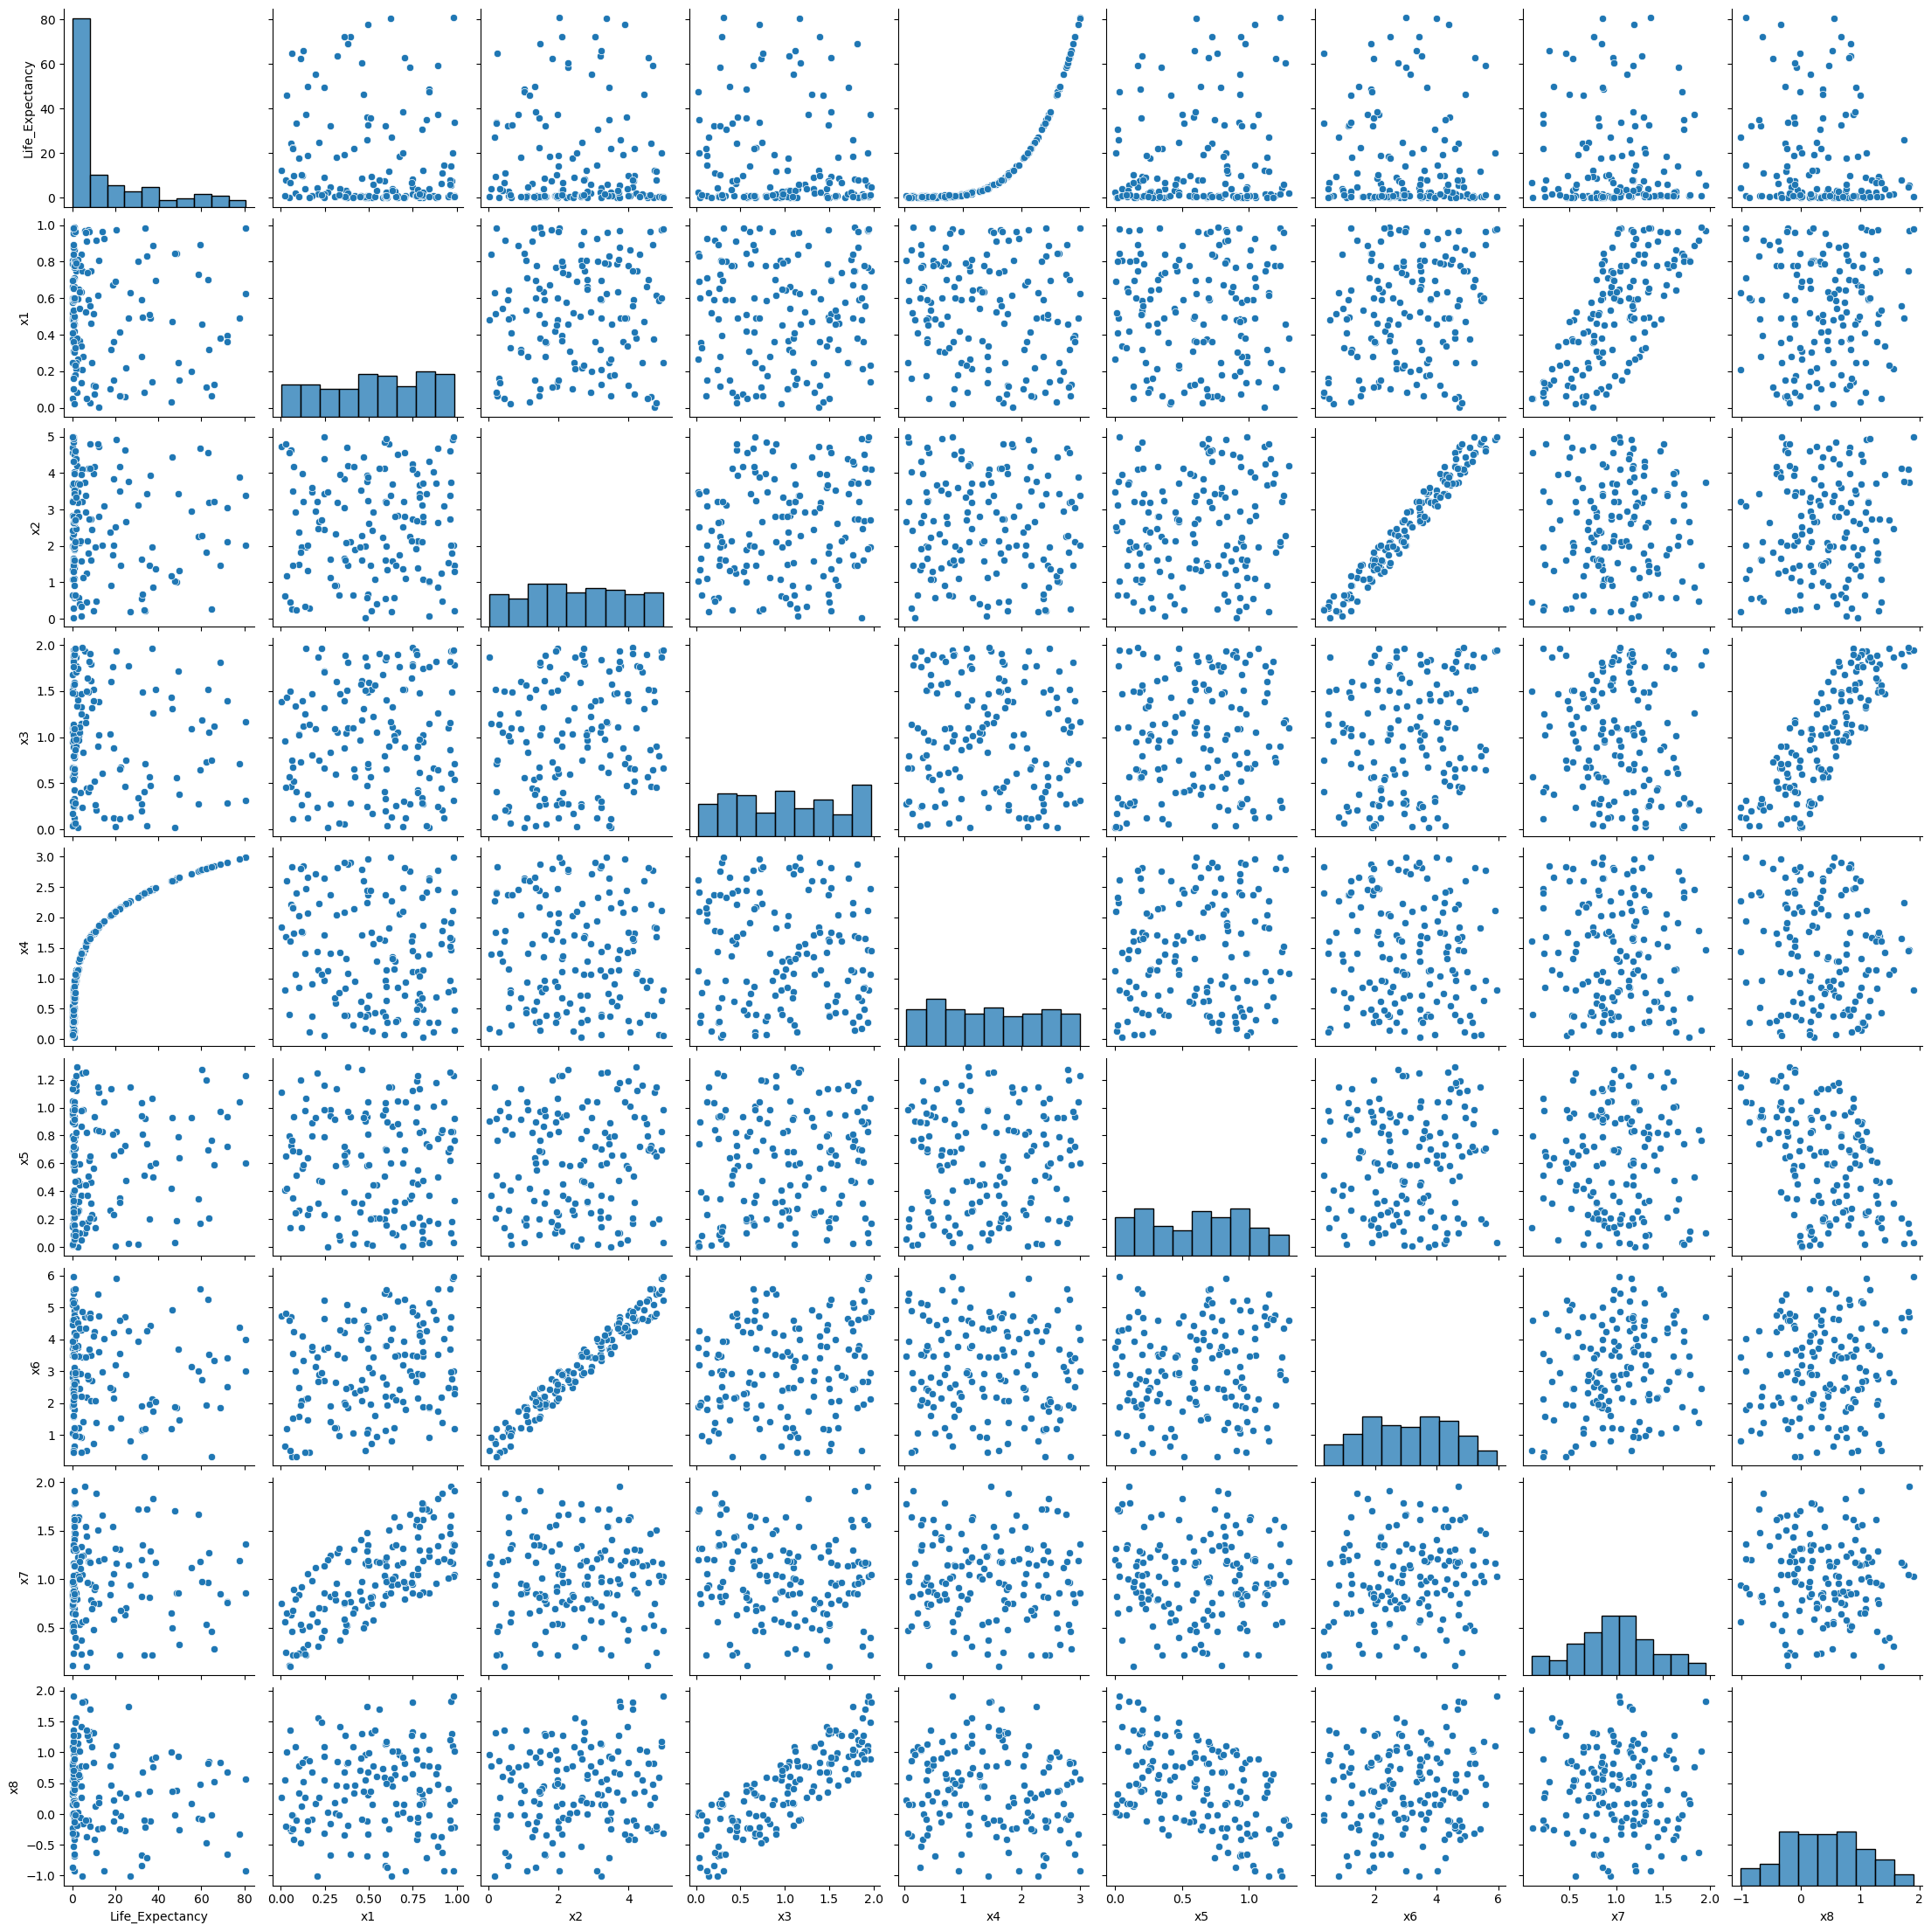

In [6]:
import seaborn as sb

sb.pairplot(data=df)

We see some interesting results from the above pair plots :-
1. Our dataset has significant amount of multi-collinerarity between the features.
2. There is a strong pattern of Life_Expectancy with x4 feature.
3. Except x4, all other features are randomly scattered and are forming very little relationship with Life_Expectancy.
4. x2 and x6 are showing strong correlations.
5. x3 and x8 are showing strong correlations.
6. x1 and x7 are showing good amount of correlation as well.

### 1.1. Checking the target

The target attribute or the output variable `Life_Expectancy` is of numerical (ratio to be precise) data type.

Clearly, the problem is a regression task as our entire dataset contains continuous numerical values.

Let us see the frequency distribution plot of the output variable `Life_Expectancy`.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

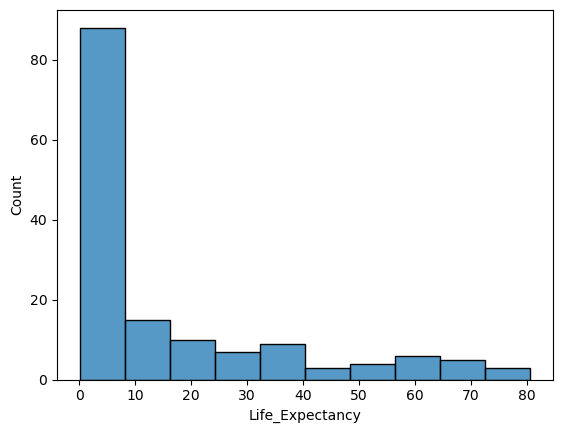

In [7]:
sb.histplot(df['Life_Expectancy'])

From the above plot, it is evident that the frequency distribution plot is <b>right-skewed</b>. 

This gives us some understanding on the nature of the data :-
1. The mean tends to be larger than the median, which suggests that there are some extreme values on the right side of the distribution.
2. The extreme values on the right side can increase the variability of the data.
3. There could be a possibility of outliers (values that are much larger than the rest of the data).
4. As the plot is not symmetrical and right-skewed, the majority of the data is concentrated on the left-hand side of the distribution.

Let's confirm on the outliers first. We will call `describe()` on our data frame and see the summary.

In [8]:
df.describe()

,Life_Expectancy,x1,x2,x3,x4,x5,x6,x7,x8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,15.573634,0.526873,2.532959,1.004755,1.437147,0.608091,3.059833,1.005223,0.396664
std,21.532456,0.287178,1.366323,0.591567,0.869658,0.365670,1.405730,0.418172,0.666874
min,0.081166,0.000789,0.039299,0.022259,0.034008,0.000504,0.324586,0.097891,-1.012279
25%,0.855930,0.286739,1.467144,0.484289,0.685930,0.263076,1.988572,0.748112,-0.100801
50%,4.188566,0.538521,2.489126,1.025886,1.410161,0.628974,2.985679,0.979791,0.389450
75%,22.455500,0.776970,3.650754,1.504459,2.163303,0.920787,4.241689,1.292235,0.892501
max,80.673096,0.986514,4.981110,1.976849,2.993408,1.293620,5.960314,1.954805,1.910219


If we look at Life_Expectancy column, it's <b>minimum value is 0.081166</b> and <b>mean value is 15.573634.</b> But the <b>maximum value is 80.673096.</b> This clearly shows a picture of outliers. The maximum value is too far from the mean.

We can also confirm this with the help of box plot.

<AxesSubplot:>

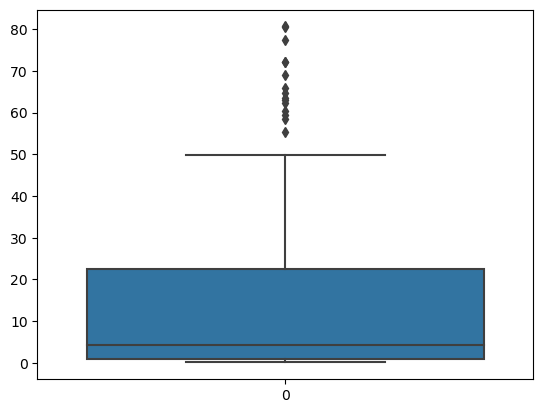

In [9]:
sb.boxplot(data=df['Life_Expectancy'])

Yes, there are outliers !!

There are many values beyond 50 which is the upper range.

### 1.2. Checking the features 

There are <b>8 features</b> namely `x1`,`x2`,`x3`,`x4`,`x5`,`x6`,`x7` and `x8`. All of these features are also of numerical (ratio to be precise) data type.

Let's look at the shape of our feature data

In [10]:
# create a data frame with all the columns except our output variable 'Life_Expectancy'
feature_data = df.loc[:, df.columns != 'Life_Expectancy']
# check the shape
feature_data.shape

(150, 8)

There are <b>150 observations</b> and <b>8 features</b>.

Let's check if our feature_data is standardised or not.

In [11]:
feature_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.526873,2.532959,1.004755,1.437147,0.608091,3.059833,1.005223,0.396664
std,0.287178,1.366323,0.591567,0.869658,0.365670,1.405730,0.418172,0.666874
min,0.000789,0.039299,0.022259,0.034008,0.000504,0.324586,0.097891,-1.012279
25%,0.286739,1.467144,0.484289,0.685930,0.263076,1.988572,0.748112,-0.100801
50%,0.538521,2.489126,1.025886,1.410161,0.628974,2.985679,0.979791,0.389450
75%,0.776970,3.650754,1.504459,2.163303,0.920787,4.241689,1.292235,0.892501
max,0.986514,4.981110,1.976849,2.993408,1.293620,5.960314,1.954805,1.910219


Clearly, our feature dataset is not standardised. By standardised, we mean that <b>mean = 0 and std (standard deviation) = 1</b>.

## 2. Training and testing a machine learning pipeline

From the above pair plots, we infer following understandings :- 
1. Not all the features are important to understand `Life_Expectancy` but since this is a healthcare domain data, a little relationship of a feature with the target variable can play a significant role.
2. As our <b>dataset has multi-collinearity, fitting Linear Regression model would cause problems because it makes it difficult to determine the individual effect of each variable on the outcome variable.</b>
3. Also, the features are not forming a linear relationship with the target attribute (Life_Expectancy). Hence, we can not choose a Linear Regression model. We may have to consider using non-linear regression models such as Polynomial Regression, Decision Trees or Random Forest.

### Reducing Multi-collinearity

Before choosing the right model, let's first reduce the multi-collinearity in our dataset. We will do <b>feature selection</b> manually as it can help to identify the most important features and reduce the dimensionality of the dataset, which can improve the performance of the model.

We have already looked from the above pair plot that :-
1. x1 and x7 are showing good amount of correlation.
2. x2 and x6 are having strong correlations.
3. x3 and x8 are also having strong correlations.

To reduce the multi-collinearity, we will keep the correlation threshold as 0.8 which means that any correlation value greater than 0.8 will be considered as a strong correlation. Let's look at the heatmap to decide further (we will be using <b>spearman</b> correlation because our data is non-parametric).

<AxesSubplot:>

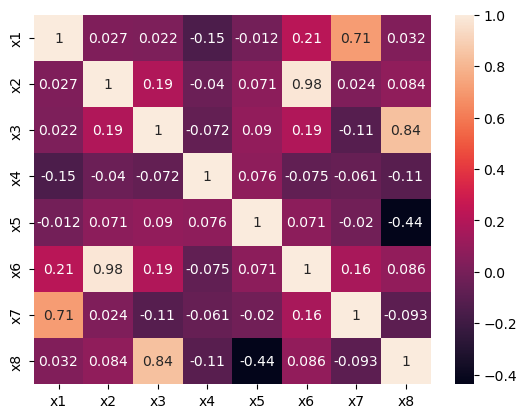

In [12]:
corr = feature_data.corr(method = 'spearman')
sb.heatmap(corr, annot = True)

From the above heatmap, we will be considering strong correlations between :-
1. x2 and x6.
2. x3 and x8.

Before taking any further action on reducing multi-collinearity, let's also understand the correlations of these features (`x2, x6, x3 and x8`) with the target attribute (`Life_Expectancy`). The more the correlation of a feature with the target attribute, the important it will be.

Let's look at the heatmap alongwith the target attribute.

<AxesSubplot:>

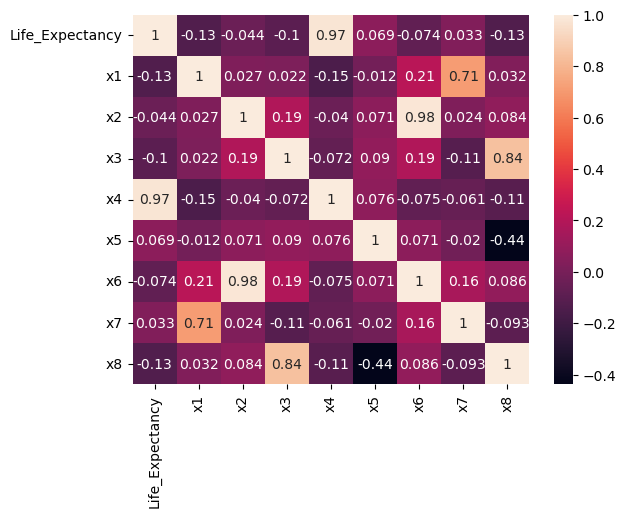

In [13]:
corr = df.corr(method = 'spearman')
sb.heatmap(corr, annot = True)

We will take x2 and x3 features for our final data set because :-
1. Between x2 (-0.044) and x6 (-0.074), x2 has slightly better correlation with the target attribute.
2. Between x3 (-0.1) and x8 (-0.13), x3 has slightly better correlation with the target attribute.

<b>Therefore, we are now left with 6 features namely, x1, x2, x3, x4, x5 and x7</b>. 

Let's update our data frame by dropping x6 and x8 features.

In [14]:
# drop x6 and x8 features from the data set
df.drop(columns=['x6', 'x8'], axis = 1, inplace = True)
# print the data frame
df 

,Life_Expectancy,x1,x2,x3,x4,x5,x7
0,32.175299,0.592109,0.545496,0.199054,2.370339,1.032510,1.199802
1,6.521285,0.911316,1.260952,0.446375,1.564526,0.820080,1.441165
2,5.688139,0.968683,3.744257,1.931173,1.472553,0.102181,1.954805
3,8.488786,0.748656,2.741351,1.790573,1.696788,0.464028,0.948294
4,63.570984,0.320502,3.196858,1.050494,2.813036,0.204284,1.273237
...,...,...,...,...,...,...,...
145,8.145065,0.558799,4.116570,1.908279,1.656721,0.207313,1.170346
146,33.262930,0.086132,0.238454,0.410397,2.399203,0.511865,0.215530
147,1.656207,0.789870,3.326645,0.981375,1.035684,0.820560,1.295516
148,1.315763,0.328342,0.642812,0.066570,0.759085,0.084414,1.312087


### Split data into train and test.

Before we train our model, we will first split our dataset into train and test. We do this to better understand our model predictions on the unseen data (test data). This approach also help us to evaluate the model performance and if there is any case of overfitting or underfitting.

In [15]:
from sklearn.model_selection import train_test_split

# create feature data frame by excluding Life_Expectancy as it is our target variable
X = df.loc[:, df.columns != 'Life_Expectancy']
# create target data frame by including only Life_Expectancy
y = df.loc[:, df.columns == 'Life_Expectancy']
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 6)
(50, 6)
(100, 1)
(50, 1)


Below are the specifications given above before splitting our data set :-
1. Train set is 67% and test set is 33% of the entire data set.
2. `random_state=42` is for reproducibility of the results.
3. `shuffle=True` is for shuffling the data before splitting. 

### Choosing a model

We will not choose Polynomial Regression model because the outliers can have a significant impact on the accuracy of the model. In order to use Polynomial Regression, we may first have to handle the outliers. There are multiple ways to do so but we have other efficient models like Decision Tree or Random Forest that supports non-linear data and are relatively insentive to outliers.

<b>We will use Random Forest here because it is a more robust model as compared to a single Decision Tree.</b> It involves the Bagging technique where multiple Decision Trees are created and predict the results. This helps in reducing overfitting (which usually comes in single Decision Tree) as we take the average of all the predictions by multiple Decison Trees. 

The interpretability of the Random Forest model becomes difficult unlike single Decision Tree but the accuracy is high. As we are dealing with the healthcare data here, we will have to look at a better accuracy model.

We will not create a <b>Pipeline</b> because we don't have multiple jobs to do before model training. Random Forest does not strictly needs feature scaling and feature selection has been done manually before. 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Instantiating random forest regressor model
rf = RandomForestRegressor(random_state = 42, oob_score = True)
# training the model
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(oob_score=True, random_state=42)

Understanding above code :- 
1. `random_state = 42` is used for the reproducibility of the results.
2. `oob_score = True` is for keeping some data out of bagging, so that those data can be used later as a test data. This helps the model to get validated on the unseen data.

With `oob_score = True`, we usually don't need splitting of data into train and test. The reason I have still splitted my dataset into train and test is because of retaining some set of data as unseen. When I train my model on training set, it will be validated with some unseen data (OOB sets) as well. When I again use this model to predict my results, I need to have another unseen data set. This will actually help me evaluating my model results better because the model will get opportunity to be tested more and more on unseen data.

We will look at all the scores - <b>Train, OOB and Test</b>

In [17]:
from sklearn.metrics import r2_score

y_prediction = rf.predict(X_test)

print("R2 Score on train set -", r2_score(y_train, rf.predict(X_train)))
print("R2 Score on OOB set -", rf.oob_score_)
print("R2 Score on unseen/test set -", r2_score(y_test, y_prediction))

R2 Score on train set - 0.9994194325257655
R2 Score on OOB set - 0.9958262159866018
R2 Score on unseen/test set - 0.9950964364672643


We see high accuracy results (close to 1) on train, OOB (Out Of Bag) and test/unseen set. This means that our <b>model has neither overfitted nor underfitted.</b> We still can not say that our model is generalized unless we look at few other metrics.

Let's look at MSE (Mean Squared Error) and MAE (Mean Absolute Error) results.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_prediction)
rmse = mse**.5
print('Mean Squared Error -', mse)
print('Root Mean Squared Error -', rmse)
print('Mean Absolute Error -', mean_absolute_error(y_test, y_prediction))

Mean Squared Error - 2.02501913813545
Root Mean Squared Error - 1.4230316715152374
Mean Absolute Error - 0.6405045526963983


The above results are fair results considering our values in the target attribute. The mean of the target attribute is 15.57 and if we look at RMSE (Root Mean Squared Error), it is 1.42 which gives us a good understanding that our model has predicted many values correctly. If this error was near to 15 or greater than 15, then the results would have been actually bad. There might be a scope of reducing these errors in tuning phase. Until we do so, we will not say that our model is a generalized one.

Let's understand the plotting of fitted values.

In [19]:
# error between actual and predicted values
residuals = y_test.values.ravel() - y_prediction
# creating new data frame for fitted, actual and residuals
df_pre_tune = pd.DataFrame({'fitted': y_prediction, 'actual': y_test.values.ravel(), 'residuals': residuals})
# get top 5 rows
df_pre_tune.head()

,fitted,actual,residuals
0,46.984010,49.777418,2.793408
1,0.314597,0.174541,-0.140056
2,1.035799,1.061771,0.025972
3,34.160005,34.809616,0.649610
4,0.967731,1.003466,0.035736


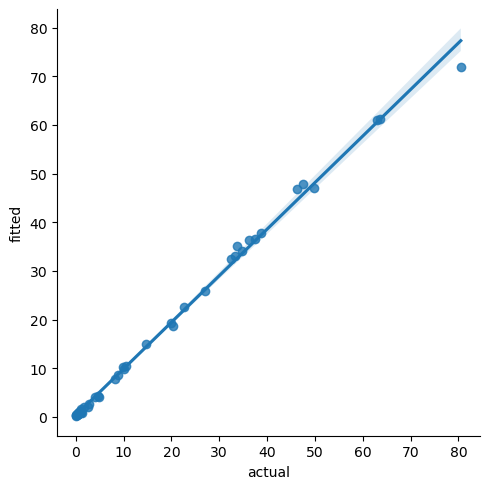

In [20]:
# plotting between actual and fitted
sb.lmplot(data=df_pre_tune, x="actual", y="fitted")

We see most of the values are accurately predicted or fitted but there is still a scope of improvement in our model as few values are not fitted properly.

### Baseline comparison
Let's compare these metric results with our baseline regression model and see if our Random Forest model has actually performed better in general.

In [21]:
from sklearn.dummy import DummyRegressor

#Instantiate the dummy regressor model with mean strategy for outcome variable
dummy_model = DummyRegressor(strategy = "mean")
# fit the dummy model on train set
dummy_model.fit(X_train, y_train)

DummyRegressor()

Let's predict the results on test set using our dummy regressor model.

In [22]:
y_pred = dummy_model.predict(X_test)
print("R2 Score -", r2_score(y_test, y_pred))
print("Mean squared error -", mean_squared_error(y_test, y_pred))

R2 Score - -2.6054436115918733e-05
Mean squared error - 412.97963926602586


Clearly, our random forest regressor model is significantly better than the dummy regressor model. 

A negative r2_score for a dummy regressor indicates that the model is performing worse than just predicting the mean of the target variable. In this case, the dummy regressor is likely not able to capture any of the underlying patterns in the data, and is just making predictions based on a simple rule.

On the other hand, an r2_score of 0.99 for our random forest regressor model suggests that the model is capturing a significant amount of the variance in the data and is making highly accurate predictions.

Also, the MSE in Dummy regressor model is much greater than the random forest regressor model. This again tells us that our random forest regressor model is making highly accurate predictions and is much better than the dummy one.

## 3. Tuning the proposed machine learning pipeline

The final feature space is <b>low dimensional (m < n)</b>, where m is number of features and n is number of observations.
    
The model has given high and almost similar accuracies on train and unseen/test data. We can still look at the scope of tuning our model and see if we can reduce the error results (MSE, R squared, MAE).

For tuning, we will use <b>GridSearchCV</b> for cross validation and `n_estimators` and `max_depth` as hyper parameters. 
    
We will try to keep the `n_estimators` as less as possible because more the number of estimators, more will be the time complexity of our model. We will also look at `max_depth` as it is an important factor in time complexity (more the max_depth, more will be the time complexity).
    
As these two hyper parameters are mostly affecting the time complexities, we will not be considering other hyper parameters. The default values for other hyper parameters will work well. Usually, in Random Forest, the default values of all the hyper parameters works well. Because we are trying to minimise the error as low as we can, we will be looking at the best ones that could affect the time complexities.

In [23]:
from sklearn.model_selection import GridSearchCV # using GridSearchCV library

# Create a parameter grid
param_grid = {
    'n_estimators': [20, 50, 80, 100], # keeping values less than 100 which is a default value
    'max_depth': [10, 15, 20, 25]
}

# Instantiate the random forest regressor model
rf = RandomForestRegressor(random_state = 1)

# Instantiate the cross validation (GridSearchCV)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

When we create a parameter grid, we provide random values for the hyper parameters. It is a <b>trial and error</b> approach where we keep on changing the values and check the results (MSE, R squared, etc.). The point where we get the minimum results is where we stop changing the values and say that these are the best estimates so far for our hyper parameters.

`cv = 10` means that we want 10 folds cross validation. This value is again random. Greater the value of cv, more number of times our data will be validated and thus, improves the model performance. Default value is `5`.

`n_jobs = -1` means that we want our cross validation to run on all the available cores of CPU parallely. This improves the execution time.

`verbose = 2` means that we want messages for the computation time for each fold and parameter candidate to be displayed in the output.

Let's fit the GridSearchCV to our train data first. We don't have to split again as we have already done it before. We will simply use the train and test data sets for our cross validation and hyper parameter tuning.

In [24]:
# Fit the GridSearchCV to the train data
grid_search.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'n_estimators': [20, 50, 80, 100]},
             verbose=2)

Now, the train data has been fit, we can look at the best parameters that GridSearchCV has evaluated for us. These best parameters will then be used for our model prediction and help in minimising the error results. Our model performance will defintely be improved.

In [25]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 80}

We see that `GridSearchCV` has evaluated `80` and `10` as best parameters for `n_estimators` and `max_depth` respectively. This is great for our model as default `n_estimators` is `100`. With the help of `GridSearchCV`, we are able to reduce the number of decision trees from 100 to 80 and thus, improving the time complexity.

Let's look at the prediction score and mean squared error on training set.

In [26]:
y_prediction_train = grid_search.predict(X_train)
print('R2 Score on train set -', r2_score(y_train, y_prediction_train))
print('MSE on train set -', mean_squared_error(y_train, y_prediction_train))

R2 Score on train set - 0.9994282002721491
MSE on train set - 0.27694863709512996


The accuracy has slightly improved (very minimal) on the training set. 

##### Accuracy on train set before tuning - 0.999419
##### Accuracy on train set after tuning -  0.999428

##### The Mean Square Error is also good.

Let's look at the prediction score and mean squared error on test set.

In [27]:
y_prediction_test = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_prediction_test)
rmse = mse**.5
print('R2 Score on test set', r2_score(y_test, y_prediction_test))
print('MSE on test set', mse)
print('RMSE on test set', rmse)
print('MAE on test set', mean_absolute_error(y_test, y_prediction_test))

R2 Score on test set 0.9968403966166879
MSE on test set 1.3048178691701509
RMSE on test set 1.1422862465994024
MAE on test set 0.5288721469364366


The accuracy has slightly improved on the test set as well. 

##### Accuracy on test set before tuning - 0.99509
##### Accuracy on test set after tuning -  0.99684

##### The Mean Square Error is also reduced from 2.025 to 1.3 which is 35% reduction. 

##### The MAE (Mean Absolute Error) is also reduced from 0.64 to 0.528. 

These are significant improvements with the help of GridSearchCV. 

Our model was not at all bad before tuning. The error results that we received were already close to their minimal. With the help of tuning, we could reduce them bit more which is again a good thing because the lesser the error, the better the model will become.

<b>Clearly, the hyper parameters (n_estimators and max_depth) have played a major role in improving the overall performance of the model and making it to be a more generalized than the previous one. In other words, they are also making our model to have best Bias-Variance Trade off (no underfitting, no overfitting).</b>

Let's look at the plot again between fitted and actual.

In [28]:
# error between actual and predicted values
residuals = y_test.values.ravel() - y_prediction_test
# creating new data frame for fitted, actual and residuals
df_post_tune = pd.DataFrame({'fitted': y_prediction_test, 'actual': y_test.values.ravel(), 'residuals': residuals})
# get top 5 rows
df_post_tune.head()

,fitted,actual,residuals
0,47.117657,49.777418,2.659761
1,0.332475,0.174541,-0.157934
2,1.083974,1.061771,-0.022203
3,34.765081,34.809616,0.044534
4,0.939018,1.003466,0.064448


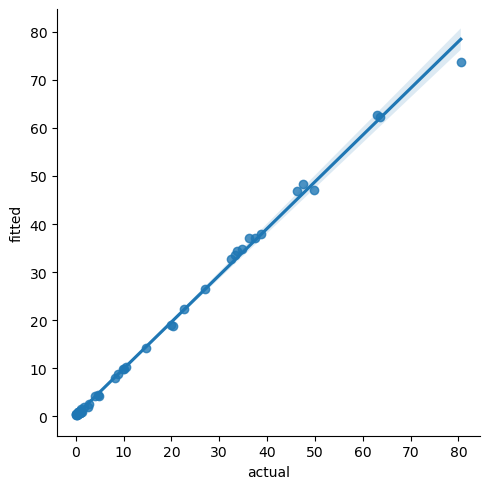

In [29]:
sb.lmplot(data=df_post_tune, x="actual", y="fitted")

Since, the improvements are minimal, it is not easy to say from the visual graph where the improvements have happened.
To understand this much better, we can plot the graph between the residuals before tuning and residuals post tuning.

In [30]:
# creating new data frame for residuals pre tuning and residuals post tuning
residuals_df = pd.DataFrame({'residuals_pre_tune': df_pre_tune.residuals.values, 
                             'residuals_post_tune': df_post_tune.residuals.values})
# get top 5 rows
residuals_df.head()

,residuals_pre_tune,residuals_post_tune
0,2.793408,2.659761
1,-0.140056,-0.157934
2,0.025972,-0.022203
3,0.649610,0.044534
4,0.035736,0.064448


<AxesSubplot:>

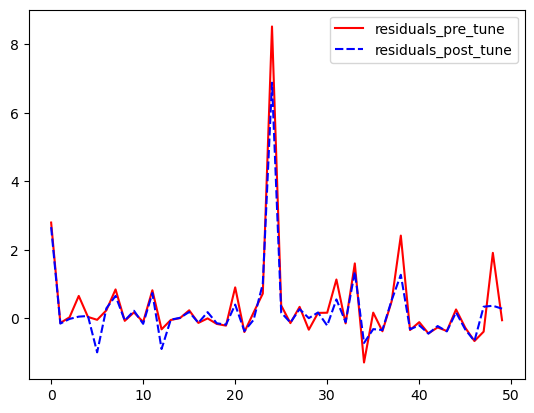

In [31]:
# we are using red and blue colours to highlight the difference better between residuals pre and post tuning.
sb.lineplot(data=residuals_df, palette=['red', 'blue'])

This graph is providing us much clearer insights about how the residuals have been reduced from pre tuning to post tuning. We see that the blue dotted lines (residuals post tuning) are mostly below the orange dotted lines (residuals pre tuning). This clearly tells us that the cross validation that we have performed is able to reduce the errors in the predicted values of the model. Our model has become significantly better. The spike between 20th and 30th observation was much high in pre tuning phase (going beyond 8.5). This error has been significantly improved in post tuning phase (coming around 6.87).

## 4. Model interpretation

### Explain whether your proposed pipeline is human interpretable

Our model is not as human interpretable as some simpler models, such as Linear Regression. This is because Random Forest is an ensemble of Decision Trees, and it can be difficult to understand how each individual tree is contributing to the overall prediction. However, Random Forest models can still provide some level of interpretability through feature importance measures, which can help identify the most important features in the model.

### Discuss whether features contain any multicollinearity and if this is a problem for your model interpretability

There were features like x2 and x3 being highly correlated with x6 and x8 respectively. We have already discussed about multi-collinearity before in detail and how we have reduced them with the help of Feature Selection.

Multi-collinearity is generally not an issue in RandomForestRegressor since it is an ensemble learning method that uses decision trees as base estimators. Decision trees are not sensitive to multicollinearity, as they can handle correlated features and do not assume any particular distribution for the input features.

In fact, RandomForestRegressor can be a useful tool for handling multicollinearity in the dataset. This is because, during the tree construction process, the algorithm randomly selects a subset of features to consider at each split. This means that even if two features are highly correlated, only one of them may be chosen for a particular split, which can reduce the impact of multicollinearity on the model's performance.

However, the reason we reduced the multi-collinearity is because there is a possibility that the two correlated features happens to be the part of a particular tree. In this case, we might see some traces of impactness of multi-collinearity on the outcome variable. Therefore, we removed it with the help of Feature Selection.

### Perform any analysis necessary to show which features are most responsible for generating the final predictions

Before looking at the most responsible features, we need to first fit our Random Forest Regressor model on the best estimates (`n_estimator = 80` and `max_depth = 10`) provided by GridSearchCV.

In [32]:
# Instantiating the model with best estimates given by GridSearchCV
rf = RandomForestRegressor(n_estimators = 80, max_depth = 10, random_state = 42)
# fitting the model on the entire data set
rf.fit(X, y.values.ravel())

RandomForestRegressor(max_depth=10, n_estimators=80, random_state=42)

The reason we are fitting the model on the entire data set is because now we have to look for the most important features. Therefore, it would be better if we give the entire data set to our model so that it can predict well about the feature importance.

Let's look at the feature importance now to understand which features are playing major role in predicting the final outcome.

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

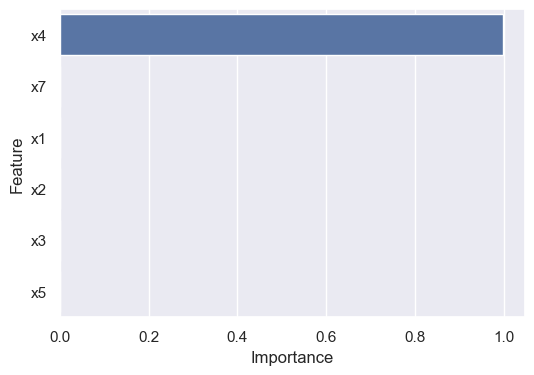

[CV] END ......................max_depth=10, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=80; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=80; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=50; total time=   0.0s
[CV] END .....................max_depth=15, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=15, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=20, n_estimators=80; total time=   0.1s
[CV] END ......................max_depth=20, n_estimators=80; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=80; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=80; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=80; total time=   0.1s
[CV] END .....................max_depth=15, n_estimators=100; total time=   0.1s
[CV] END .....................max_depth=15, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=25, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=25, n_estimators=20; total time=   0.0s
[CV] END ...................

In [33]:
features = pd.DataFrame({ "Feature": X.columns, "Importance": rf.feature_importances_})

sb.set(rc={'figure.figsize':(6,4)})
sb.barplot(
    x = "Importance", 
    y = "Feature", 
    data = features,
    order = features.sort_values('Importance', ascending = False).Feature
)

We see that only `x4` feature has importance. Therefore, it is the only feature that is most responsible to generate final predictions (also discussed in the pair plot).

### Stability of findings

Our findings are very stable because of the following reasons :-
1. We have used Random Forest Regressor which is generally considered to be a stable machine learning algorithm. This is because the random forest model is constructed by combining multiple decision trees that are trained on different subsets of the training data using different random subsets of features. The randomness introduced in the selection of the subsets of data and features helps to reduce the variance of the model and prevents overfitting, resulting in a more stable and reliable model. 
2. Additionally, the use of out-of-bag samples in Random Forest Regressor provides a way to validate the model during the training process, which helps to ensure that the model is not overfitting to the training data.
3. We have also performed cross validation with the help of GridSearchCV. This has choosen the best parameters for our model by creating 10 folds of our data set and thereby, reducing the error results (MSE, MAE, RMSE). This is indeed one of the best techniques to improve the overall performance of the model. The stability in the model increases because each model gets trained and evaluated 10 times (cv = 10 folds) and hence, reducing the overfitting.

## 4. Discussion: pros/cons and time complexity of the designed pipeline

### Summary 

As we have used Random Forest Regressor, we did not require feature scaling. Even the multi-collinearity was not a matter of big concern with this model but we still did it due to the fact that there is a possibility of highly correlated features to be part of same decision tree and can affect the model prediction. We did the Feature selection manually and reduced the multi-collinearity. Therefore, we did not require a pipeline because most of the jobs that are actually needed to be present in the pipeline were either manually taken care of (Feature Selection) or not required (Feature Scaling).

Ramdom Forest Regressor is capable of giving highly accurate results because it involves multiple decision trees to make predictions and then take the mean of all the predictions. This reduces the overfitting that usually occur in single Decision Tree. 

We have also used GridSearchCV to perform cross validation which helps the model to reduce it's errors of Mean Squared Error and Mean Absolute Error and improves the overall performance even more.

### Introduce the time complexity of the full introduced pipeline

To understand the time complexity of our model, let us first understand few things :-

1. For each combination of hyperparameters, the Random Forest Regressor model will be trained and evaluated using 10-fold cross-validation. Since there are 4 values for each hyperparameter, this will result in a total of 4 x 4 = 16 combinations.
2. For each combination of hyperparameters, the Random Forest Regressor model will be trained and evaluated using 10-fold cross-validation. Since there are 100 observations in the training data and 10-fold cross-validation is used, each fold will have 10 observations. Therefore, the Random Forest Regressor model will be trained 10 x 16 = 160 times.
3. The time complexity of training a single decision tree is O(n * m * log(n)), where n is the number of observations and m is the number of features. In this case, the time complexity of training a Random Forest Regressor model with `n` trees and maximum depth `d` is `O(n * T * d)`.
4. Since the number of trees and the maximum depth of the trees are hyperparameters, the time complexity of training each model will depend on their values. We know that maximum number of trees is 80 and the maximum depth is 10. Then, the time complexity of training each model will be `O(80 * 10 * 10) = O(8000)`.
5. Therefore, the total time complexity of training and evaluating all 16 combinations of hyperparameters will be `O(160 * 8,000) = O(12,80,000)`.
6. As we have also given `n_jobs = -1` , it means that we have instructed `GridSearchCV` to <b>use all available CPU cores for parallel processing.</b> In this case, the time complexity would depend on the number of CPU cores available on my machine. As my machine has <b>8 CPU cores</b>, therefore the time complexity would be reduced by a factor of 8, and the actual time taken to complete the computation would be significantly reduced `(1280000 / 8 = 160000)`.
7. We are assuming that there are no other processes or programs running on my machine that would compete for CPU resources.

In summary, the time complexity of fitting on training data will be O(1,60,000).

The time complexity on the testing data is lower than the training phase and would be would be O(n * m * log(T)) where n is the number of test observations (50 in this case), m is the number of features in the test data (6 in this case), and T is the maximum depth of the decision trees (10 in this case). 

The time complexity of the testing phase will depend on the number of estimators selected in the best hyperparameters and the number of features in the test data. For each estimator, the test data will go through all the decision trees in the forest, and the time taken will depend on the depth of the trees and the number of features in the test data.

Therefore, the time complexity in test phase will be `O(50 * 6 * log(10)) = O(300)` assuming base of the log as 10.


### Discuss which are the steps having the highest impact on time execution, especially to handle a larger dataset

The below code will be having the highest impact on time execution, especially on a  larger dataset 

`grid_search.fit(X_train, y_train.values.ravel())`

It is because we are fitting on training data here. The time complexity of fitting on training data is O(1,60,000) and it is greatly dependent upon the number of observations. As the observations increases, the training set in each decision tree increases and hence, increases the time complexity of training a single tree. If the time complexity gets increased for training a single tree, the time complexity of training a Random Forest Regressor model will significantly gets increased (`O(n * T * d)`). And if the time complexity of training a model increases, then the overall time complexity will get increased because it will get multiplied by different combinations of hyperparamters used in GridSearchCV.

### Strengths

1. By tuning the hyperparameters using GridSearchCV, we are able to find the best combination of hyperparameters that can give the optimal performance of the model.
2. 10-fold cross-validation helps in obtaining an unbiased estimate of the model's performance on unseen data.
3. Using n_jobs=-1 helps in utilizing all available CPU cores, which can significantly speed up the training process.
4. Random Forest Regressor model reduces overfitting in decision trees and helps to improve the accuracy.
5. Scaling of features is not required as it uses a rule-based approach.
6. With the help of cross validation (GridSearchCV), we were able to minimise the errors in the predicted values of the model even much better than before (pre-tuning).

### Limitations

1. GridSearchCV can be computationally expensive, especially when the number of hyperparameters and their values are large. In this case, with 2 hyperparameters and 4 values each, the model is trained and evaluated 16 times for each fold of the cross-validation, resulting in a total of 160 model fits. This can be time-consuming and may not be feasible for larger datasets or more complex models.
2. The model is trained and evaluated on a smaller dataset, and the performance of the model may vary on different datasets. Therefore, it is important to evaluate the model's performance on multiple datasets to ensure that it generalizes well.
3. The Random Forest regressor itself demands a lot of computational power and resources because it builds a lot of trees and then combines their outputs.
4. It also lacks interpretability due to the ensemble of decision trees and fails to evaluate the significance of each variable.

### Improvements

1. <b>Increase the size of the dataset:</b> A larger dataset may improve the performance of the model and increases the generalization ability of the model.
2. <b>Hyperparameter tuning:</b> This is a trial and error approach and very tedious. There may be some other best hyper parameters that could reduce the MSE, MAE and RMSE errors even more.